<a href="https://colab.research.google.com/github/moamanuldin/my_track/blob/main/Final_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we import our flowchart

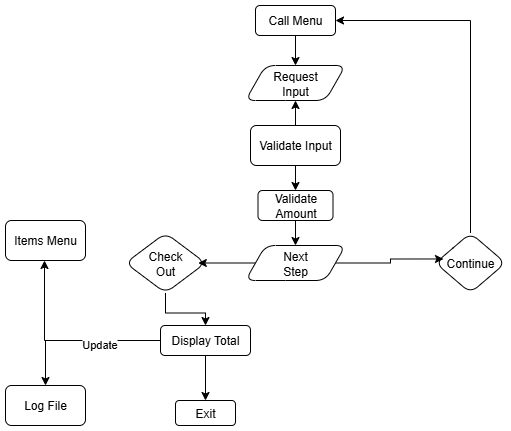

Next, We import necessary libaries

In [1]:
import pandas as pd
import datetime

Next, we create the Menu, cart, and save the menu to a file

In [2]:
in_stock = {
    "Apple": {"Stock": 5, "Price": 20},
    "Banana": {"Stock": 12, "Price": 17},
    "Mango": {"Stock": 10, "Price": 25}
}
cart = {}
# Convert the stock dictionary to a pandas DataFrame
stock_df = pd.DataFrame.from_dict(in_stock, orient='index')
# Save the DataFrame to a CSV file
stock_df.to_csv('stock_data.csv')

print("Stock data saved to a csv file")

Stock data saved to a csv file


Now that the stock is saved to a file, we call the data from the file directly
just in case the data is updated and to provide live updates as well.

In [3]:
with open('stock_data.csv', 'r') as stock:
    df = pd.read_csv(stock, index_col=0)

# Error Codes:
error 101 = item not found  
error 102 = out of stock  
error 103 = cart is empty  
error 104 = invalid amount  
error 105 = Invalid Option  
error 106 = Invalid input  


Now that the stock file is opened, we start the app

In [31]:
TAX_RATE = 1.12
transactions = []

# To show all items
def show_items():
    print("Available items:")
    for name, info in df.iterrows():
        print(f"- {name}: {info['Stock']} in stock at ${info['Price']} each")

# To show cart
def show_cart():
    print("You have in cart:\n")
    for name, info in cart.items():
        print(f"- {name}: {info['amount']} , ${info['price'] * info['amount']}")

# To display menu
def main_menu():
  print("Choose an option\n")
  choice = input("""
  1- Select item
  2- View cart
  3- Checkout
  4- Exit\n
  """)
  return choice

# Validate inputs
def get_valid_choice():
    while True:
        purchase = input("Choose an item: ").strip().title()
        if purchase in df.index:
          if df.loc[purchase, "Stock"] > 0:
              return purchase
          else:
              print(f"Error 102, {purchase} is out of stock.")
        else:
            print("Error101, Item not found. Please choose from the list.")

# Validate Amount
def get_valid_amount(purchase):
    max_amount = df.loc[purchase, "Stock"]
    while True:
        amount_str = input(f"Enter quantity (1–{max_amount}): ").strip()
        if amount_str.isdigit():
            amount = int(amount_str)
            if 1 <= amount <= max_amount:
                return amount
        print("Error 104, Invalid quantity; please try again.")

# Handling New and Existing items in cart
def handle_new_item(purchase):
    amount = get_valid_amount(purchase)
    cart[purchase] = {
        "amount": amount,
        "price": df.loc[purchase, "Price"],
        "total": amount * df.loc[purchase, "Price"]
        }
    print(f"Added {amount} x {purchase} to cart.")
    return cart


def handle_existing_item(purchase):
    current = cart[purchase]["amount"]
    print(f"You have {current} x {purchase} in your cart.")
    while True:
        action = input("Choose: (1) Adjust quantity, (2) Continue shopping, (3) Checkout: ").strip()
        if action == '1':
            new_amount = get_valid_amount(purchase)
            diff = new_amount - current
            df.loc[purchase, "Stock"] -= diff
            cart[purchase]["amount"] = new_amount
            print(f"Updated {purchase} to {new_amount} units in cart.")
            return 'continue'
        elif action == '2':
            return 'continue'
        elif action == '3':
            return 'checkout'
        else:
            print("Error 105, Invalid option; please enter 1, 2, or 3.")

# Subtotal
def calculate_subtotal():
    subtotal = sum(df.loc[item, "Price"] * data["amount"] for item, data in cart.items())
    return round(subtotal * TAX_RATE, 2)

# Checkout
def checkout():
    total = calculate_subtotal()
    print("\nCheckout Summary:")
    for purchase, data in cart.items():
        price = df.loc[purchase, "Price"]
        print(f"- {purchase}: {data['amount']} x ${price} = ${price * data['amount']}")
    print(f"Total with tax: ${total}\n")
    # confirm = input("Proceed to payment? (y/n): ").strip().lower()

    while True:
      confirm = input("Proceed to payment? (y/n): ").strip().lower()
      if confirm in ['y', 'yes']:
        save_transaction(cart)
        print("Payment successful. Thank you for shopping!")
        break
      elif confirm in ['n', 'no']:
        print("Payment canceled. Exiting.")
        cart.clear()
        break
      else:
        print("Error 106, Invalid input. Please enter 'y' or 'n'.")


# Update stock after checkout is successful
def update_stock():
  for item, data in cart.items():
    df.at[item, "Stock"] -= data["amount"]
  print("Stock updated.")
  df.to_csv('stock_data.csv')

# Save transaction to file
def save_transaction(cart):
  items = [(product_name, details["amount"]) for product_name, details in cart.items()]

  new_transaction = [
      {
          "timestamp": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
          "items": items,
          "total": calculate_subtotal()
      }
                     ]
  transactions_df = pd.DataFrame(new_transaction)
  transactions_df.to_csv("transactions.csv", mode="a", header=False, index=False)


# Main Function
def main():
    print("Welcome to the shop!\n")
    show_items()
    while True:
      choice = main_menu()
      if choice == '4':
        break
      elif choice == '1':
        purchase = get_valid_choice()
        if purchase in cart:
          action = handle_existing_item(purchase)
          if action == "checkout":
            checkout()
            update_stock()
            break
          elif action == "c":
            continue
        else:
          handle_new_item(purchase)
          action = input("Continue shopping or checkout? (c/checkout): ").strip().lower()
          if action == "checkout":
            checkout()
            update_stock()
            break
          elif action == "continue":
            continue

      elif choice == '2':
        show_cart()
        continue
      elif choice == '3':
        calculate_subtotal()
        checkout()
        update_stock()
        cart.clear()
        break
      else:
        print("Error 105, Invalid option; please enter 'continue' or 'checkout'.")


if __name__ == '__main__':
    main()

Welcome to the shop!

Available items:
- Apple: 0 in stock at $20 each
- Banana: 8 in stock at $17 each
- Mango: 4 in stock at $25 each
Choose an option


  1- Select item
  2- View cart
  3- Checkout
  4- Exit

  4
